In [7]:
# for array computations and loading data
import numpy as np

# for ploting
import matplotlib.pyplot as plt

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf

In [6]:
#load the dataset
data = np.loadtxt('/Users/berekettesfaye/Desktop/ML_projects/coursera_evaluation/data_w3_ex1.csv',delimiter = ',')

# split the inputs and  outputs into separate arrays
x = data[:, 0]
y = data[:, 1]

# convert 1-D arrays into 2-S because the commandes later will requaire it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"The shape of the input(x): {x.shape}")
print(f"The shape of the target value(y): {y.shape}")


The shape of the input(x): (50, 1)
The shape of the target value(y): (50, 1)


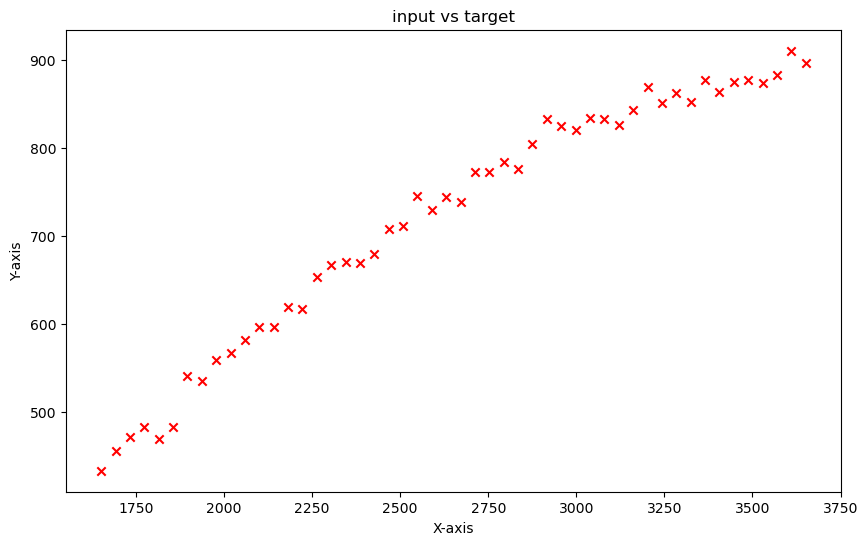

In [21]:
def plot(x,y):
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, marker='x',  color='r')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('input vs target')
    plt.grid(False)
    plt.show()
plot(x,y)

----Split the dataset into training, cross validation, and test sets----
* training set - used to train the model

* cross validation set (also called validation, development, or dev set) - used to evaluate the different model configurations you are choosing from. For example, you can use this to make a decision on what polynomial features to add to your dataset.

* test set - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions while you are still developing the models.


In [15]:
# get the 60% of the dataset as the training set. and save the rest 40% in x_,y_
x_train,x_,y_train,y_ = train_test_split(x,y,test_size=0.40, random_state=1)

#use  x_ and y_ to creat cross validation and test set
x_cv,x_test, y_cv, y_test = train_test_split(x_,y_,test_size= 0.50, random_state=1)

# delete x_, y_ because we are not gonna use it
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


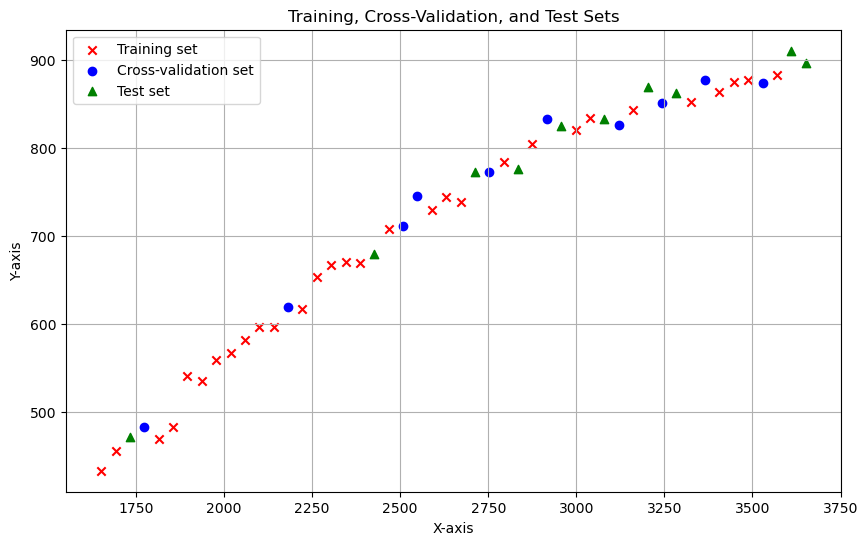

In [18]:
# Plotting the data with different symbols for each set
plt.figure(figsize=(10, 6))

plt.scatter(x_train, y_train, color='red', marker='x', label='Training set')
plt.scatter(x_cv, y_cv, color='blue', marker='o', label='Cross-validation set')
plt.scatter(x_test, y_test, color='green', marker='^', label='Test set')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Training, Cross-Validation, and Test Sets')
plt.legend()
plt.grid(True)
plt.show()

- i will perform feature scaleing on the training dataset to help my model to converge faster
  

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


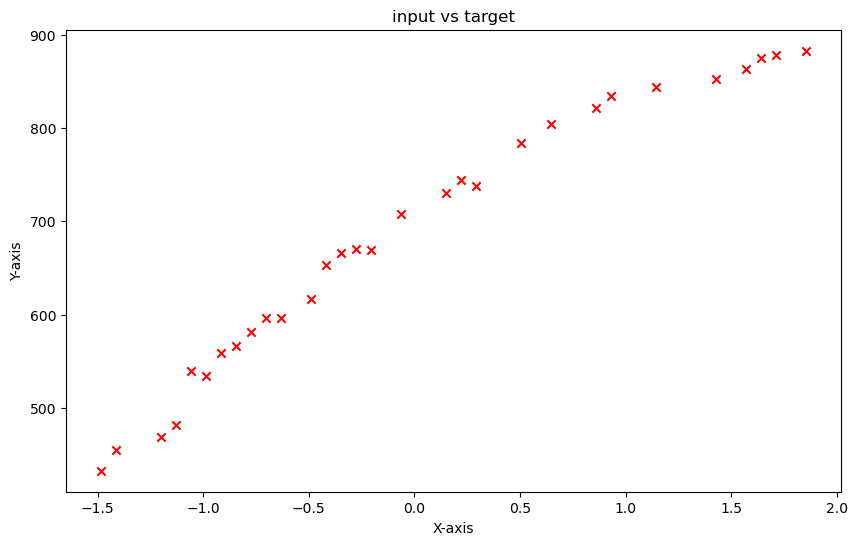

In [22]:
# Intialize the class
scaler_linear = StandardScaler()

# Computes the mean and standard deviation of the training set then transform it
x_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

plot(x_train_scaled,y_train)

* Train the model
* i willl be using linear reggression

In [23]:
# intialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train_scaled,y_train)

LinearRegression()

- now will evaluate the model i by calcualting the mean squared error , i will do it in two way the first is by using the scikit-learn utility function and divide it by two and the second i will create a mean square error function from scrach

In [24]:
# feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

#for loop implementation 
total_squared_error = 0
for i in range(len(yhat)):
    squared_error_i = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i
mse = total_squared_error/(2* len(yhat))
print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 406.19374192533127
training MSE (for-loop implementation): 406.19374192533127


* now use the cross validation set compare the mse to evaluate if my model is generalizing

In [28]:
# first scale the data set with the mean and standard deviation of the training data
x_cv_scaled = scaler_linear.transform(x_cv)
print(f"Computed mean of the cros validation set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the cross validation set: {scaler_linear.scale_.squeeze():.2f}")

# now feed the scaled cross validation
yhat = linear_model.predict(x_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"cross validation MSE(using sklearn function): {mean_squared_error(y_cv,yhat)/2}")

Computed mean of the cros validation set: 2504.06
Computed standard deviation of the cross validation set: 574.85
cross validation MSE(using sklearn function): 551.7789026952216


*Adding Polynomial Features

From the graphs earlier, you may have noticed that the target y rises more sharply at smaller values of x compared to higher ones. A straight line might not be the best choice because the target y seems to flatten out as x increases. Now that you have these values of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance. The code will mostly be the same but with a few extra preprocessing steps. Let's see that below.

1. i will generate polynomial features for training and cross validation data set using PolynomailaFeatures class
2. in order to introduce more polynomial terms and see which one gives the best performance , i will create a loop that computes all teh steps , it will compute polynomail features up to degree = 10 

In [44]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# loop over 10 times. each adding one more degree of polynomial higher than the last 
for degree in range(1,11):
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias = False)
    x_train_mapped  = poly.fit_transform(x_train)
    polys.append(poly)

    #scale the training set
    poly_scaler = StandardScaler()
    x_train_mapped_scaled = poly_scaler.fit_transform(x_train_mapped)
    scalers.append(poly_scaler)

    # creat and train the model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled,y_train)
    models.append(model)

    # compute the MSE
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train,yhat) / 2
    train_mses.append(train_mse)

    # add ploynomial feature  and scale  the cross validation set
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = poly_scaler.transform(x_cv_mapped)

    # Compute the the cross validation MSE
    yhat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv,yhat)/2
    cv_mses.append(cv_mse)
    






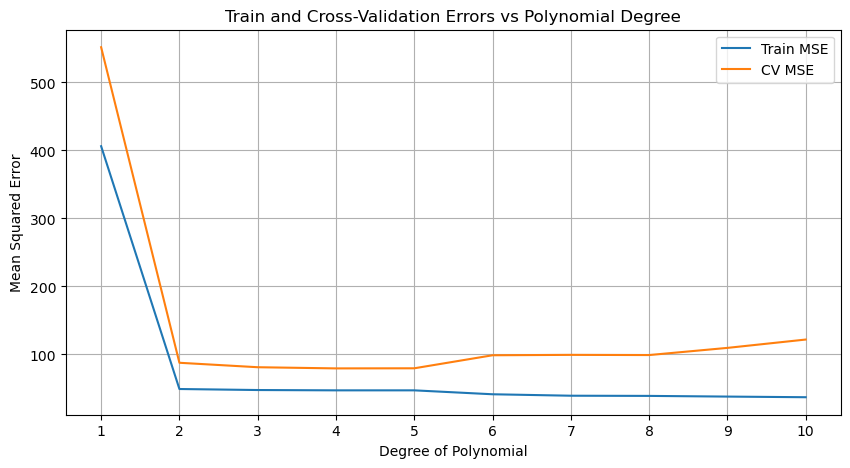

In [45]:
# Plot train and cross-validation errors
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_mses, label='Train MSE')
plt.plot(range(1, 11), cv_mses, label='CV MSE')
plt.title('Train and Cross-Validation Errors vs Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

* Choosing the best model

  - when selecting the mode i will choose the one that performs good in the training and cross validation set, we notice a sharp drop in the cross validation error from the model with the degree = 1 to degree = 2. after that its relatively flat line up to degree = 5, after that however the cross validation started to ge worse as i add more polynomial features. given these results i will use the model will the lowest cv_mse as the one best suited for my application

In [46]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) +1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


* now i can perform the generalization error by computing the test sets MSE. as usual , i will transform this data the same way i did with the training and cross validation sets

In [47]:
# Add polynomial features to the test set
x_test_mapped = polys[degree - 1].transform(x_test)

# Scale the test set
x_test_mapped_scaled = scalers[degree - 1 ].transform(x_test_mapped)

#compute the MSE of the test set
yhat = models[degree - 1].predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test,yhat)/2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63
